<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Luis María Ramirez de la Rosa

**Fecha:** 06 de octubre del 2020.

**Expediente** : IF691761
    
**Profesor:** Oscar David Jaramillo Zuluaga. 
   
**Link:** 
    
# Tarea 9

## Enunciado de tarea
Para ver si la venta de chips de silicio son independientes del punto del ciclo de negocios en que se encuentre la economía del país se han recogido las ventas semanales de una empresa y datos acerca de la economía del país, y se reportan los siguientes resultados:
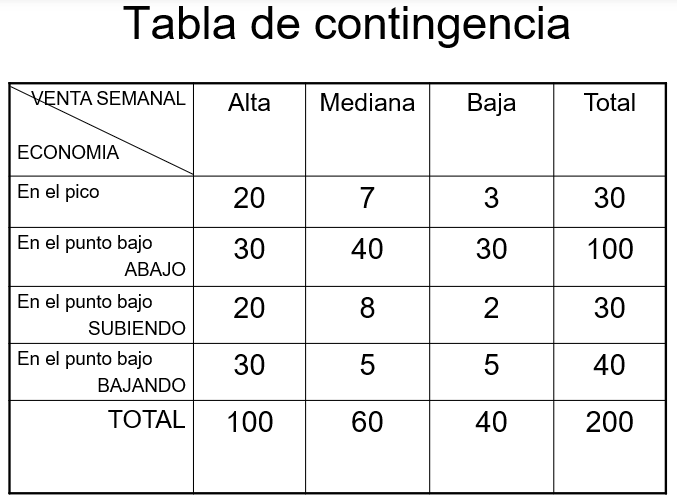
Realice la prueba de chi-cuadrado para validar la independencia del punto del ciclo de negocios en que se encuentre la economía.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st

In [2]:
# Data Frame con la informacion de la tabla
data = [[20,7,3,30], [30,40,30,100], [20,8,2,30], [30,5,5,40], [100,60,40,200]]
data = pd.DataFrame(data, columns=['Alta','Mediana','Baja','Total'], 
                    index=['Pico','Abajo','Subiendo','Bajando','Total'])
print(data)

          Alta  Mediana  Baja  Total
Pico        20        7     3     30
Abajo       30       40    30    100
Subiendo    20        8     2     30
Bajando     30        5     5     40
Total      100       60    40    200


In [3]:
P = (data.iloc[:,3]/data.iloc[-1,-1])[0:4]  # % de la Economia respecto al Total
a_observado = data.iloc[0:4,0:3].values.flatten() # Datos sin totales en un sola arreglo
a_esperado = np.concatenate([a*data.iloc[-1,:-1] for a in P])
a_observado, a_esperado

(array([20,  7,  3, 30, 40, 30, 20,  8,  2, 30,  5,  5]),
 array([15.,  9.,  6., 50., 30., 20., 15.,  9.,  6., 20., 12.,  8.]))

In [4]:
# Método chi cuadrado
chi = st.chisquare(a_observado, a_esperado, ddof=6) # ddof es (Nfilas-1)*(Ncolumnas-1), sin totales
print('Valor de chi cuadrado = ',list(chi)[0],', p-value de la prueba=',list(chi)[1])
Ji = st.chi2.ppf(q=0.9, df=6)
print('Estadístico de Ji = ',Ji)
# st.t.interval

Valor de chi cuadrado =  34.59722222222222 , p-value de la prueba= 1.810412864466741e-06
Estadístico de Ji =  10.644640675668422


In [5]:
x = st.chi2.cdf(list(chi)[0], df=6)
x

0.9999948428471871

Recordemos las hipótesis.
$$H_0 : P_A=P_M=P_B$$
$$H_1 : P_A,P_M,P_B$$
Como el P-value es muy pequeño (casi 0), se acepta $H_0$.